# Импорт библиотек

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# Импорт датасета

In [11]:
# !pip install kagglehub
import kagglehub

# path = kagglehub.dataset_download("nalisha/most-popular-songs-on-youtube-2025")

ds = pd.read_csv("/Users/olgasenaeva/.cache/kagglehub/datasets/nalisha/most-popular-songs-on-youtube-2025/versions/1/youtube-top-100-songs-2025.csv")

# Базовый анализ таблицы

In [29]:
# Первые пять строк таблицы
print(ds.head())

# Общая характеристика содержания таблицы:
print('\nInfo:')
print(ds.info())

# Статистика числовых характеристик:
print('\nStatistics of numerical characteristics:')
display(ds.describe())

# Название колонок
pd.DataFrame(ds.columns, columns=['Column Name'])

# Пропущенные значения в колонках
print('\nStatistics on missing values in columns:')
ds.isnull().sum()

                                               title  \
0   ROSÉ & Bruno Mars - APT. (Official Music Video)   
1  Lady Gaga, Bruno Mars - Die With A Smile (Offi...   
2  Reneé Rapp - Leave Me Alone (Official Music Vi...   
3  Billie Eilish - BIRDS OF A FEATHER (Official M...   
4            Reneé Rapp - Mad (Official Music Video)   

                                           fulltitle  \
0   ROSÉ & Bruno Mars - APT. (Official Music Video)   
1  Lady Gaga, Bruno Mars - Die With A Smile (Offi...   
2  Reneé Rapp - Leave Me Alone (Official Music Vi...   
3  Billie Eilish - BIRDS OF A FEATHER (Official M...   
4            Reneé Rapp - Mad (Official Music Video)   

                                         description  view_count categories  \
0  ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...  2009014557      Music   
1  MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...  1324833300      Music   
2  Listen to “BITE ME”, the new album from Reneé ...     2536628      Music   
3  Listen 

,view_count,duration,channel_follower_count
count,1.000000e+02,100.000000,1.000000e+02
mean,1.059103e+08,203.900000,1.612067e+07
std,2.491132e+08,44.260592,1.980038e+07
min,1.161000e+03,120.000000,1.000000e+00
25%,1.852702e+07,173.000000,6.132500e+05
50%,3.798224e+07,193.500000,6.320000e+06
75%,1.111073e+08,231.750000,2.760000e+07
max,2.009015e+09,354.000000,7.620000e+07



Statistics on missing values in columns:


title                      0
fulltitle                  0
description                0
view_count                 0
categories                 0
tags                      15
duration                   0
duration_string            0
live_status                0
thumbnail                  0
channel                    0
channel_url                0
channel_follower_count     0
dtype: int64

# Итоги базового анализа:
1. Общая характеристика содержания таблицы
- В датасете всего 100 записей;
- Всего 13 столбцов, 10 - объектного типа (object) и 3 числовых (`view_count`, `duration`, `channel_follower_count`);
- Пропусков практически нет, только в стобце tags, что говорит о довольно чистом датасете
  
2. Анализ числовых характеристик
- Количество просмотров (`view_count`). Очень сильная разница между минимальным и максимальными значениями, от 1,6 миллионов до 2 миллиардов, среднее - 106 миллионов.
- Продолжительность (`duration`). Почти все треки — в типичном диапазоне длительности популярных песен (3–6 минут).
- Количество подписчиков канала (`channel_follower_count`). Тоже очень большой разброс. От 1 до 76 миллионов, со средним значением - 16 млн. Минимальное значение, вероятно, связано с недавно созданным каналом.
Вывод:
Популярность песни на YouTube не всегда зависит от размера канала, но крупные каналы чаще встречаются в топ-100. Это можно будет подтвердить через анализ корреляции.

3. Пропуски в заполнении данных
- Единственный столбец с пропусками — `tags`.
Возможно, часть клипов не содержит тегов или данные не были выгружены.

# Анализ числовых признаков

In [27]:
# 10 самых популярных каналов
print('Top-10')
print(ds.groupby('channel')['view_count'].sum().sort_values(ascending=False).head(10))

# Live vs Non-Live
print('\nLive vs Non-Live:')
print(ds['live_status'].value_counts())

# Корреляция между числовыми признаками
print('\nCorrelation of numerical features:')
ds.corr(numeric_only=True)

Top-10
channel
ROSÉ                 2240541280
Lady Gaga            1562032073
Sabrina Carpenter    1117474778
Billie Eilish         747239602
Kendrick Lamar        610278219
JENNIE                335218998
LLOUD Official        289611150
Shaboozey             288277902
Sevdaliza             236500879
Ed Sheeran            219111485
Name: view_count, dtype: int64

Live vs Non-Live:
live_status
False    100
Name: count, dtype: int64

Correlation of numerical features:


,view_count,duration,live_status,channel_follower_count
view_count,1.000000,0.102707,NaN,0.113510
duration,0.102707,1.000000,NaN,0.210203
live_status,NaN,NaN,NaN,NaN
channel_follower_count,0.113510,0.210203,NaN,1.000000


# Выводы
1. Топ-10 по популярности каналов:
- Топ-3 (ROSÉ, Lady Gaga, Sabrina Carpenter) набрали сильно больше просмотров, чем остальные — у них совокупно ≈ 4,9 млрд;
- В рейтинге отслеживается тенденция мировой популярности представителей K-Pop индустрии ((ROSÉ, JENNIE, LLOUD Official), хотя большинство, конечно, звезды мировой величины.

2. Live vs Non-Live:
- В топ-100 нет ни одной Live-записи концерта, что говорит о том, что зрители предпочитают профессионально снятые клипы с ярким визуальным рядом, а не концертные выступления;

3. Корреляция между числовыми признаками
- Корреляция между всеми числовыми признаками довольно низкая;
- `view_count` / `duration`: слабая положительная корреляция — длительность почти не влияет на просмотры;;
- `view_count` / `channel_follower_count`: слабая связь - вирусные хиты возможны даже у менее популярных каналов.
- `duration` / `channel_follower_count`: слабая положительная связь — более крупные каналы могут выпускать немного более длинные клипы.

# Графический анализ

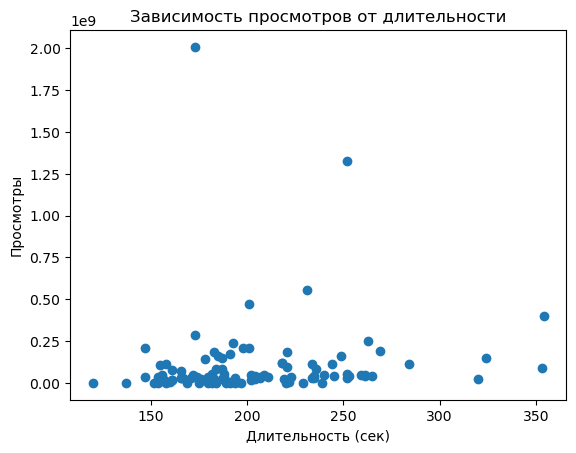

In [30]:
# Длительнность просмотров
# (Не теряют ли слишком долгие клипы популярность?)
plt.scatter(ds['duration'], ds['view_count'])
plt.xlabel('Длительность (сек)')
plt.ylabel('Просмотры (млрд.)')
plt.title('Зависимость просмотров от длительности')
plt.show()

# Выводы:
1. Большинство клипов имеют продолжительность в диапазоне от 150 до 240 секунд (≈2,5–4 минуты) — это типичный формат коммерчески успешных песен.
2. Основная масса просмотров сосредоточена до ~250 млн, однако есть несколько выбросов, достигающих 1,5–2 млрд просмотров.
3. Самые популярные клипы (включая топ-3) находятся в оптимальном временном диапазоне — около 3 минут, что подчёркивает, что даже мегахиты не выходят за рамки привычной длительности

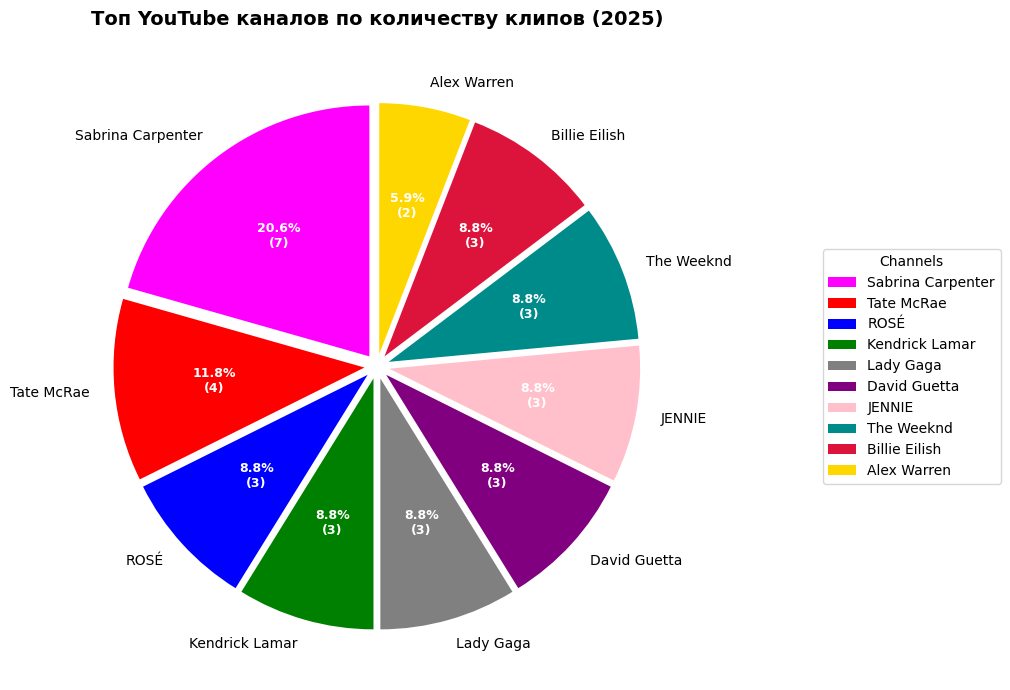

In [41]:
# Подсчёт количества песен на каждом канале (топ-10)
import matplotlib.pyplot as plt

ds1 = ds["channel"].value_counts().head(10)


colors = ["magenta", "red", "blue", "green", "gray", 
          "purple", "pink", "darkcyan", "crimson", "gold"]
explode = [0.05] * len(ds1)


plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(
    ds1.values,
    labels=ds1.index.astype(str),
    colors=colors,
    autopct=lambda p: f"{p:.1f}%\n({int(p*sum(ds1.values)/100)})",  # процент + количество
    startangle=90,
    explode=explode,
    textprops={'fontsize': 10, 'color': 'black'},
)

plt.setp(autotexts, size=9, weight="bold", color="white")
plt.title("Топ YouTube каналов по количеству клипов (2025)", fontsize=14, fontweight="bold", pad=20)
plt.legend(wedges, ds1.index, title="Channels", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1))
plt.tight_layout()

plt.show()

# Выводы:
1. Sabrina Carpenter — лидер чарта, у неё 7 клипов (≈20,6%) от всех песен топ-100.
2. Tate McRae занимает второе место — 4 клипа (≈11,8%)
3. Группы артистов с одинаковой долей (по 3 клипа ≈8,8%) — ROSÉ, Kendrick Lamar, Lady Gaga, David Guetta, JENNIE, The Weeknd, Billie Eilish — демонстрируют широкий международный охват
4. Наблюдается гендерное преобладание женщин-артисток в топе 2025 года

# Анализ тегов для вычисления наиболее популярного музыкально направления 

,genre,view_count,count_videos,avg_views_per_video
8,pop,6327366110,40,1.581842e+08
6,k-pop,3052652484,9,3.391836e+08
0,alternative,815049263,7,1.164356e+08
2,dance,705330903,9,7.837010e+07
4,hip hop,509783148,7,7.282616e+07
1,country,498118586,2,2.490593e+08
11,rock,319919280,4,7.997982e+07
7,latin,174553002,1,1.745530e+08
12,soul,160421970,1,1.604220e+08
3,electronic,119280381,2,5.964019e+07


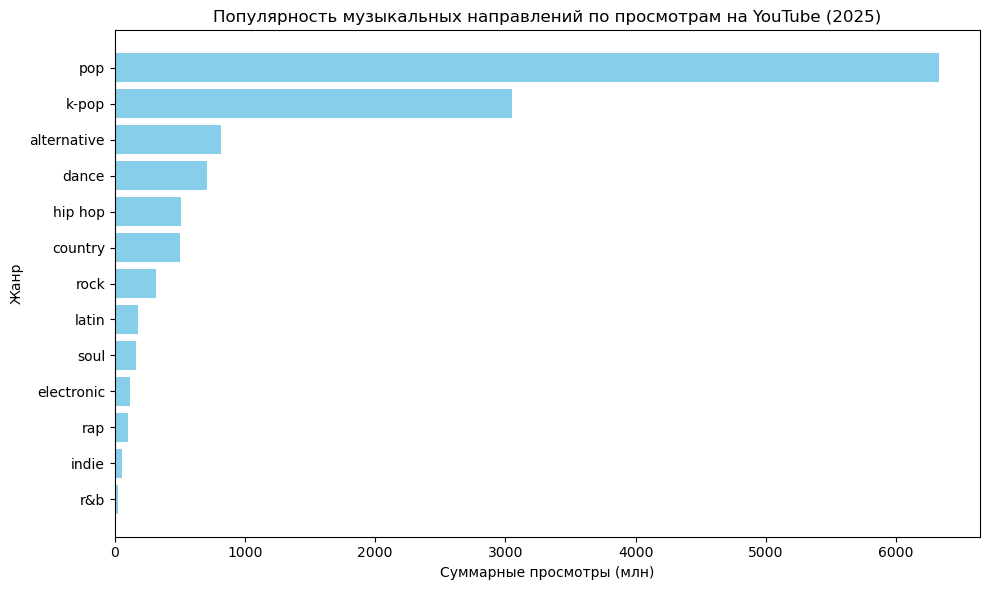

In [45]:
# копия датасета
df_tags = ds.copy()

# заполняем пропуски и приводим теги к нижнему регистру
df_tags['tags'] = df_tags['tags'].fillna('').str.lower()

# базовые жанры (можно расширить при необходимости)
genres_dict = {
    'pop': ['pop'],
    'hip hop': ['hip hop', 'hip-hop', 'hiphop'],
    'rap': ['rap'],
    'r&b': ['r&b', 'rnb'],
    'rock': ['rock'],
    'indie': ['indie'],
    'electronic': ['electronic', 'edm', 'electro'],
    'dance': ['dance'],
    'latin': ['latin'],
    'k-pop': ['k-pop', 'kpop'],
    'country': ['country'],
    'jazz': ['jazz'],
    'soul': ['soul'],
    'alternative': ['alternative']
}

# функция поиска жанров (с учётом синонимов)
def extract_genre(tags):
    found = []
    for genre, variants in genres_dict.items():
        for v in variants:
            if v in tags:
                found.append(genre)
                break  # если один вариант найден, остальные можно не искать
    return ', '.join(found) if found else np.nan

df_tags['genre_detected'] = df_tags['tags'].apply(extract_genre)

# создаем таблицу со статистикой
genre_stats = (
    df_tags.dropna(subset=['genre_detected'])
           .assign(genre=df_tags['genre_detected'].str.split(', '))
           .explode('genre')
           .groupby('genre', as_index=False)
           .agg({
               'view_count':'sum',
               'title':'count'
           })
           .rename(columns={'title':'count_videos'})
           .sort_values(by='view_count', ascending=False)
)

# добавим средние просмотры на одно видео
genre_stats['avg_views_per_video'] = genre_stats['view_count'] / genre_stats['count_videos']

# вывод
display(genre_stats)

# создаем график
plt.figure(figsize=(10,6))
plt.barh(genre_stats['genre'], genre_stats['view_count']/1e6, color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Суммарные просмотры (млн)')
plt.ylabel('Жанр')
plt.title('Популярность музыкальных направлений по просмотрам на YouTube (2025)')
plt.tight_layout()
plt.show()

# Выводы по анализу тегов
1. Поп-музыка (Pop) — абсолютный лидер по популярности:
    - 40 клипов (40% всех, где жанр определен);
    - суммарно более 6,3 млрд просмотров;
    - в среднем ≈158 млн просмотров на клип.
2. K-Pop уверенно занимает второе место — 9 клипов и 3,05 млрд просмотров, при этом средний показатель самый высокий среди жанров — ≈339 млн просмотров на видео.
3. Alternative и Dance занимают среднюю позицию по числу видео (7–9), но у них также высокие суммарные просмотры (815 млн и 705 млн соответственно).
4. Hip-hop и Country набрали примерно одинаковые суммарные просмотры (≈500 млн каждая категория), но при разном объёме видео:
    - Hip-hop — 7 клипов (≈72 млн на одно видео);
    - Country — всего 2 клипа, но по ≈249 млн просмотров каждый.
5. Rock постепенно теряет позиции — всего 4 клипа (≈80 млн просмотров на видео).
6. Latin, Soul, Electronic, Rap, Indie, R&B встречаются редко (1–3 видео), однако Latin и Soul показывают высокую эффективность — более 150 млн просмотров на видео.